In [2]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#import the dataset
df_train = pd.read_excel(r'C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Flight_Price_Prediction\Data_Train.xlsx')
df_test =  pd.read_excel(r'C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Flight_Price_Prediction\Test_set.xlsx')

**Basic understanding of the dataset**

In [5]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_train.shape

(10683, 11)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
## missing value count
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

 We can see that we have very very small amount of missing value present in the dataset . Let us drop those rows from the dataset

In [9]:
df_train = df_train.dropna()

In [10]:
df_train.shape

(10682, 11)

In [11]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

So we can see that we do not have any more missing values without any significance affect on the dataset

Let us have a separate column in this dataset as 'type' for train and test data

In [12]:
df_train['type']="train"

In [13]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


#### Now look into test dataset

In [14]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [15]:
df_test.shape

(2671, 10)

We can see that test set do not have price column. Let us create price column as well as type column for this dataset

In [16]:
df_test['Price']=''
df_test['type']='test'

In [17]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,,test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,,test
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,,test
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,,test
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,,test


In [18]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
type               0
dtype: int64

In [19]:
df = pd.concat([df_train,df_test])

In [20]:
df.shape

(13353, 12)

### EDA

#### Let us look into date- time variables first

In [21]:
#Date_of_Journey: Get the date and the month from the date. Also find the weekday 
df['Journey_date']=pd.to_datetime(df_train.Date_of_Journey,format = "%d/%m/%Y").dt.day
df['Journey_month']=pd.to_datetime(df_train.Date_of_Journey,format = "%d/%m/%Y").dt.month
df['Weekday']=pd.to_datetime(df_train.Date_of_Journey,format = "%d/%m/%Y").dt.weekday
#drop column Date_of_Journey from the dataset as it will not be required
df.drop('Date_of_Journey',axis=1,inplace = True)

Let us check if the date of journey is in weekend or weekdays

In [22]:
df['Weekend']=df['Weekday'].apply(lambda x:1 if x>4 else 0)
df.drop('Weekday',axis=1,inplace = True)

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,Journey_date,Journey_month,Weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train,1,5,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train,9,6,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train,12,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train,1,3,0


In [24]:
#Let us fix the Dep_Time column
# Extracting Hours & minutes
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.hour

#Let us fix the Arrival_Time column
#Extracting Hours & minutes
df["Arr_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arr_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

#Let us drop Dep_Time & Arrival_Time from the the dataset
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace = True)

In [25]:
# Let us fixed the Duration column
# 1. Split the column in Hour and minute column.
# 2. Convert the hour column into minutes and then add the minute column and get only one minute column
df[['hour','minute']]=df.Duration.str.split(expand=True)
# Remove the 'h' from the hour column
df['hour']=df['hour'].str[:-1]
# Remove the 'm' from the hour column
df['minute']=df['minute'].str[:-1]
# Convert hours into integer and converts two minutes
df['hour']=df['hour'].astype(int)*60
# impute the null values in minute column with 0
df['minute']=df['minute'].fillna(0)
# Convert minutes into integer
df['minute']=df['minute'].astype(int)
#Now add the hour and minute column together
df['Duration_new']=df['hour']+df['minute']
# Now drop the Duration column
df.drop(['Duration','hour','minute'],axis=1,inplace = True)

In [26]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,type,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,train,24,3,1,22,22,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,train,1,5,0,5,5,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,train,9,6,1,9,9,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,train,12,5,1,18,18,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,train,1,3,0,16,16,21,35,285


#### Let us look into the Categorical Variables

In [27]:
# Additional info
df.Additional_Info.value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

'No info' and 'No Info' are same. Hence let us convert them into same

In [28]:
df['Additional_Info']=df['Additional_Info'].apply(lambda x:'No info' if x=='No Info' else x)
df.Additional_Info.value_counts()/df.shape[0]

No info                         0.785966
In-flight meal not included     0.181682
No check-in baggage included    0.029656
1 Long layover                  0.001498
Change airports                 0.000599
Business class                  0.000374
2 Long layover                  0.000075
Red-eye flight                  0.000075
1 Short layover                 0.000075
Name: Additional_Info, dtype: float64

In [29]:
#We can see that Additional_info has almost 80% of no information. Hence, we can drop this column
df.drop('Additional_Info',axis=1,inplace = True)

In [30]:
# Route and the Total_Stops are providing the same information. We can remove Route column
df.drop('Route',axis=1,inplace =True)

In [31]:
# Total_Stops
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [32]:
#Total_Stops is a Ordinal Categorical type. We need to perform label encoder
df['Total_Stops']=df['Total_Stops'].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,type,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new
0,IndiGo,Banglore,New Delhi,0,3897,train,24,3,1,22,22,1,10,170
1,Air India,Kolkata,Banglore,2,7662,train,1,5,0,5,5,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,train,9,6,1,9,9,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,train,12,5,1,18,18,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,train,1,3,0,16,16,21,35,285


In [34]:
# Source
df.Source.value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

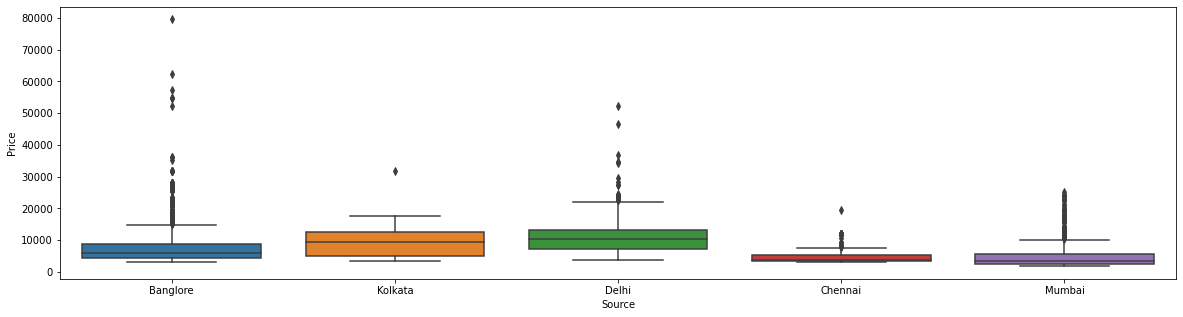

In [35]:
#Let us check the relation of Price with Source. We need to consider the train dataset as test data do not have price
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Source', y = 'Price', data = df_train)
#df.info()

In [36]:
# Destination
df.Destination.value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

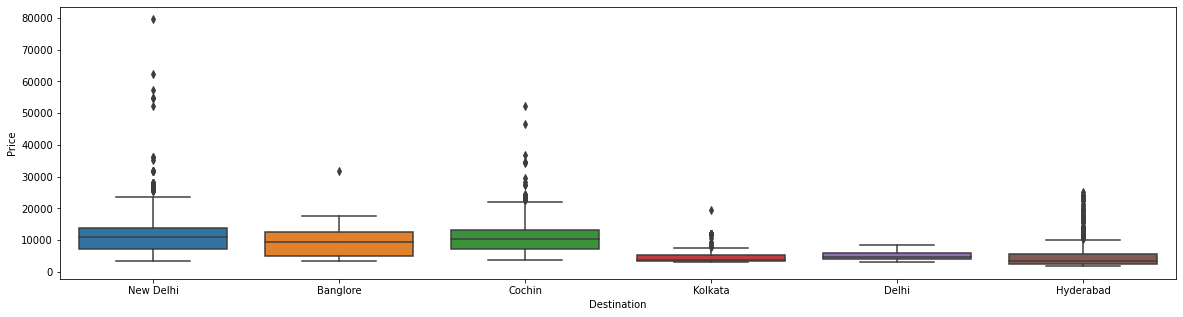

In [37]:
#Let us check the relation of Price with Source. We need to consider the train dataset as test data do not have price
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Destination', y = 'Price', data = df_train)
#df.info()

In [38]:
#SInce Source and Destinations are nominal categorical variables, we need to use one hot encoding
Source_new = df[['Source']]
Source_new = pd.get_dummies(Source_new, drop_first= True)
df = pd.concat([df,Source_new],axis=1)

Dest_new = df[['Destination']]
Dest_new = pd.get_dummies(Dest_new, drop_first= True)
df = pd.concat([df,Dest_new],axis=1)

In [39]:
df.drop(['Source','Destination'],axis=1,inplace=True)
df.head()

,Airline,Total_Stops,Price,type,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,train,24,3,1,22,22,1,10,170,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,train,1,5,0,5,5,13,15,445,0,0,1,0,0,0,0,0,0
2,Jet Airways,2,13882,train,9,6,1,9,9,4,25,1140,0,1,0,0,1,0,0,0,0
3,IndiGo,1,6218,train,12,5,1,18,18,23,30,325,0,0,1,0,0,0,0,0,0
4,IndiGo,1,13302,train,1,3,0,16,16,21,35,285,0,0,0,0,0,0,0,0,1


In [40]:
#Airline
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

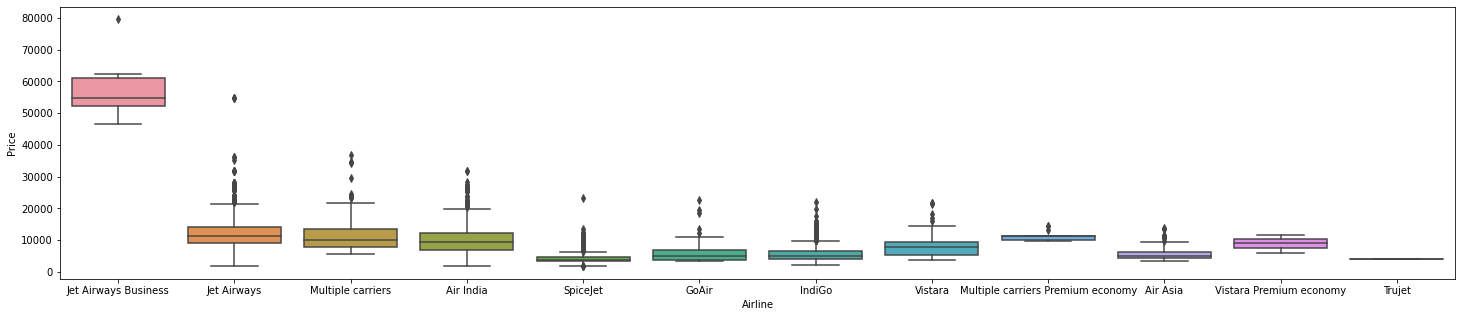

In [41]:
plt.figure(figsize = (25,5))
sns.boxplot(x = 'Airline', y = 'Price', data = df_train.sort_values('Price',ascending=False))

In [42]:
#Jet Air has highest fair
df_jet = df_train[df_train['Airline']=="Jet Airways"]

<AxesSubplot:xlabel='Source', ylabel='Price'>

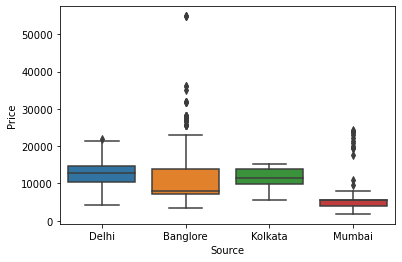

In [43]:
sns.boxplot(x='Source',y='Price',data=df_jet)

In [44]:
df.head()

,Airline,Total_Stops,Price,type,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,train,24,3,1,22,22,1,10,170,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,train,1,5,0,5,5,13,15,445,0,0,1,0,0,0,0,0,0
2,Jet Airways,2,13882,train,9,6,1,9,9,4,25,1140,0,1,0,0,1,0,0,0,0
3,IndiGo,1,6218,train,12,5,1,18,18,23,30,325,0,0,1,0,0,0,0,0,0
4,IndiGo,1,13302,train,1,3,0,16,16,21,35,285,0,0,0,0,0,0,0,0,1


In [45]:
#Snce Airlin is a nominal categorical variables, we need to use one hot encoding
Airline_new=pd.get_dummies(df['Airline'],drop_first=True)
df = pd.concat([df,Airline_new],axis=1)
df.drop('Airline',axis=1,inplace = True)

In [46]:
df.head()

,Total_Stops,Price,type,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,train,24,3,1,22,22,1,10,170,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,train,1,5,0,5,5,13,15,445,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,train,9,6,1,9,9,4,25,1140,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,train,12,5,1,18,18,23,30,325,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,train,1,3,0,16,16,21,35,285,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [47]:
#Since we have done most of the preprocessing in both train and test dataset, let us separate them now
df_train_new = df[df['type']=='train']
df_test_new = df[df['type']=='test']

In [48]:
# Drop the type column
df_train_new.drop('type',axis=1,inplace = True)
df_test_new.drop('type',axis=1,inplace = True)

C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_train_new.shape,df_test_new.shape

((10682, 30), (2671, 30))

In [50]:
df_train_new.head()

,Total_Stops,Price,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,1,22,22,1,10,170,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,0,5,5,13,15,445,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,1,9,9,4,25,1140,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,1,18,18,23,30,325,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,0,16,16,21,35,285,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [51]:
df_train_new.head()

,Total_Stops,Price,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,1,22,22,1,10,170,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,0,5,5,13,15,445,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,1,9,9,4,25,1140,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,1,18,18,23,30,325,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,0,16,16,21,35,285,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [52]:
# Let us check the feature importance by ExtraTreesRegressor

In [53]:
X = df_train_new.drop('Price',axis=1)
y = df_train_new[['Price']]

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor()

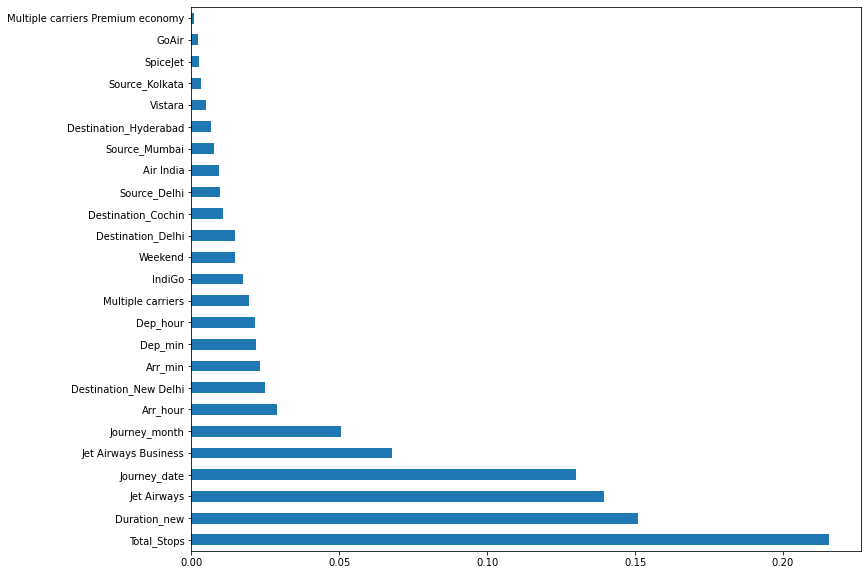

In [55]:
plt.figure(figsize = (12,10))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

Test the price column

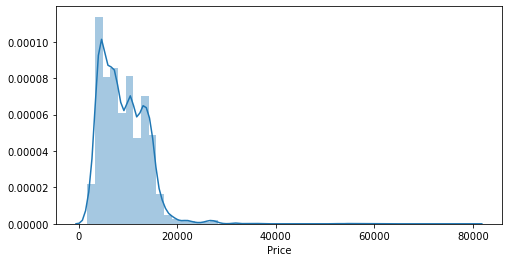

In [56]:
plt.figure(figsize=(8,4))
sns.distplot(df_train_new['Price'])
plt.show()

 We can see that price column is normally distributed if we handle the missing values. However, it depends on what model we are going to use

# Lasso Regression

In [57]:
ls_train = df_train_new.copy()
ls_test = df_test_new.copy()

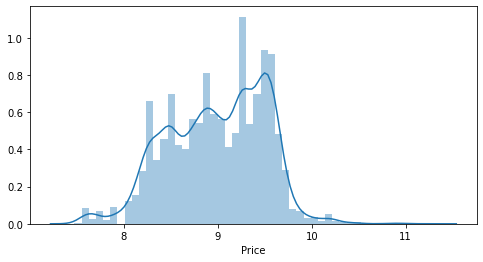

In [58]:
ls_train['Price'] = np.log(ls_train['Price'].astype(int))
plt.figure(figsize=(8,4))
sns.distplot(ls_train['Price'])
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(ls_train, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
a=df_train.columns
df_train[a] = scaler.fit_transform(df_train[a])
df_train.head()

C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Total_Stops,Price,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
10228,0.255078,0.624104,-0.532026,-1.461552,1.550750,-1.319153,-1.319153,-0.499768,0.020903,-0.720417,-0.19056,-0.859086,-0.604081,-0.261042,-0.859086,-0.366406,-0.261042,-0.19056,3.164140,-0.439836,-0.138637,-0.490074,1.321313,-0.023136,-0.350728,-0.034715,-0.285905,-0.011566,-0.219271,-0.016357
3770,0.255078,1.176957,-0.886642,1.104917,-0.644849,1.477709,1.477709,-1.378353,0.020903,-0.494828,-0.19056,1.164028,-0.604081,-0.261042,1.164028,-0.366406,-0.261042,-0.19056,-0.316042,-0.439836,-0.138637,-0.490074,1.321313,-0.023136,-0.350728,-0.034715,-0.285905,-0.011566,-0.219271,-0.016357
1535,-1.229139,-1.430334,1.241052,-1.461552,1.550750,1.302905,1.302905,1.403832,-0.281993,-0.936198,-0.19056,-0.859086,-0.604081,-0.261042,-0.859086,-0.366406,-0.261042,-0.19056,3.164140,-0.439836,-0.138637,-0.490074,-0.756823,-0.023136,-0.350728,-0.034715,3.497660,-0.011566,-0.219271,-0.016357
3294,1.739296,1.906387,-0.886642,-1.461552,-0.644849,0.079278,0.079278,0.378816,1.535387,1.996456,-0.19056,-0.859086,-0.604081,3.830803,-0.859086,-0.366406,3.830803,-0.19056,-0.316042,-0.439836,-0.138637,-0.490074,1.321313,-0.023136,-0.350728,-0.034715,-0.285905,-0.011566,-0.219271,-0.016357
6681,0.255078,0.473059,-0.532026,1.104917,1.550750,0.079278,0.079278,-0.206907,0.626697,1.506046,-0.19056,1.164028,-0.604081,-0.261042,1.164028,-0.366406,-0.261042,-0.19056,-0.316042,-0.439836,-0.138637,-0.490074,1.321313,-0.023136,-0.350728,-0.034715,-0.285905,-0.011566,-0.219271,-0.016357


In [63]:
y_train = df_train.pop('Price')
X_train = df_train

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [65]:
lasso = Lasso()
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.903989953948667, tolerance: 0.6005081822275614
  positive)
C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2276099950238404, tolerance: 0.5950832984871455
  positive)
C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9742116817021724, tolerance: 0.5980198658428739
  positive)
C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.241182,0.117357,0.008430,0.012363,1e-05,{'alpha': 1e-05},-0.396667,-0.396382,-0.396018,-0.404444,-0.389002,-0.396503,0.004891,1,-0.394311,-0.396082,-0.395491,-0.392608,-0.397491,-0.395196,0.001650
1,0.092329,0.004420,0.002200,0.000397,0.0001,{'alpha': 0.0001},-0.396661,-0.396395,-0.396021,-0.404466,-0.389018,-0.396512,0.004893,2,-0.394327,-0.396093,-0.395499,-0.392617,-0.397500,-0.395207,0.001650
2,0.015606,0.001004,0.002269,0.000289,0.001,{'alpha': 0.001},-0.396708,-0.396610,-0.396206,-0.404728,-0.389214,-0.396693,0.004914,3,-0.394584,-0.396290,-0.395674,-0.392782,-0.397686,-0.395403,0.001650
3,0.012507,0.000480,0.002503,0.000433,0.01,{'alpha': 0.01},-0.399979,-0.399558,-0.400654,-0.409356,-0.391923,-0.400294,0.005531,4,-0.398413,-0.400017,-0.399271,-0.396439,-0.400976,-0.399023,0.001544


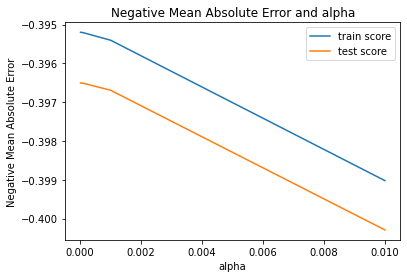

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [68]:
model_cv.best_estimator_

Lasso(alpha=1e-05)

In [69]:
lasso = Lasso(alpha = 0.00001)

In [70]:
lasso.fit(X_train, y_train)

C:\Users\91973\Anaconda3\envs\newenv_2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.835820008834162, tolerance: 0.7477000000000003
  positive)


Lasso(alpha=1e-05)

In [71]:
lasso.coef_

array([ 3.87446678e-01, -1.18323132e-01, -9.15460334e-02,  3.53059963e-02,
        8.83291891e-03,  3.08997474e-17,  2.06716724e-03, -4.07159266e-03,
        1.91246129e-02, -8.65949155e-03,  6.90636572e-02,  4.62175356e-02,
       -1.68188006e-01,  0.00000000e+00, -6.29794116e-02, -6.02381748e-03,
       -8.64841316e-04,  1.05724631e-01,  1.87418165e-01,  3.00940570e-03,
        3.98712376e-02,  5.05447191e-01,  8.19119077e-02,  2.79165658e-01,
        3.64671234e-02, -5.59331034e-02, -2.72474782e-03,  1.40058517e-01,
        1.40851580e-02])

In [72]:
from sklearn.metrics import r2_score

In [73]:
# Train set prediction with Lasso Regression model
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.7216603720437811


In [74]:
len(lasso.coef_[lasso.coef_ != 0])

28

In [75]:
# Lasso Regression model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "const")
lasso_coeff = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coeff.columns = ['Features', 'Coefficients']

In [76]:
# Dropping the constant from the list of coefficients
lasso_coeff = lasso_coeff.drop(0)

In [77]:
top = lasso_coeff.sort_values(by = 'Coefficients', ascending = False).head(10)
top

,Features,Coefficients
22,Jet Airways,0.505
1,Total_Stops,0.387
24,Multiple carriers,0.279
19,Air India,0.187
28,Vistara,0.140
18,Destination_New Delhi,0.106
23,Jet Airways Business,0.082
11,Source_Delhi,0.069
12,Source_Kolkata,0.046
21,IndiGo,0.040


# Random Forest

In [78]:
rf_train = df_train_new.copy()
rf_test = df_test_new.copy()

In [79]:
y = rf_train.pop('Price')
X = rf_train

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
y_pred = rf.predict(X_test)

In [84]:
rf.score(X_train, y_train)

0.952333410835265

In [85]:
rf.score(X_test, y_test)

0.8175798904186427

Text(0.5, 0, 'Errors')

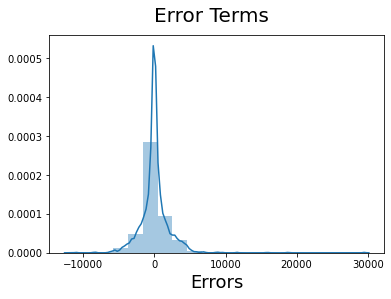

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

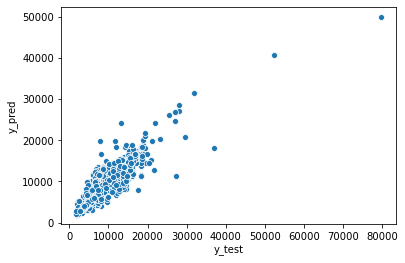

In [87]:
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8175798904186427

Hyperparameter TUning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [92]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=100, n_jobs = -1)

In [93]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [95]:
prediction = rf_random.predict(X_test)

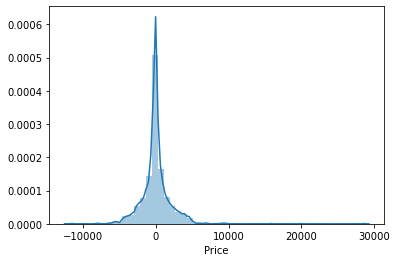

In [96]:
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'y_pred')

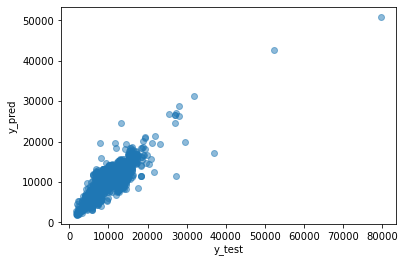

In [97]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [98]:
from sklearn import metrics

In [99]:
metrics.r2_score(y_test, y_pred)

0.8175798904186427

# XG Boost Regressor

In [100]:
xg_train = df_train_new.copy()
xg_test = df_test_new.copy()

In [101]:
y = xg_train.pop('Price')
X = xg_train

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

In [103]:
from xgboost import XGBRegressor

In [104]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred = xg.predict(X_test)

In [106]:
xg.score(X_train, y_train)

0.9272143347327997

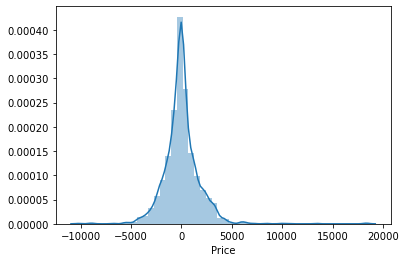

In [107]:
sns.distplot(y_test-y_pred)
plt.show()

Text(0, 0.5, 'y_pred')

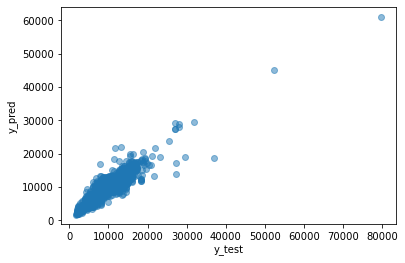

In [108]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [109]:
from sklearn import metrics

In [110]:
metrics.r2_score(y_test, y_pred)

0.8587102538911691

### Hyperparameter Tuning

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
params = {
        'min_child_weight': [1, 5, 10],
        'colsample_bytree': np.arange(0.3,0.5,0.1),
        'colsample_bylevel': np.arange(0.3,0.5,0.1),
        'max_depth': range(6,10),
        'n_estimators': range(100,1000)
        }

folds =15
param_comb = 5
scoring = {'MSLE': 'neg_mean_squared_log_error', 'r2_score': 'r2'}

In [113]:
xg_random = RandomizedSearchCV(estimator = xg, 
                               param_distributions = params,
                               scoring='neg_mean_squared_log_error',
                               n_iter = 10,
                               cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               return_train_score = True)

In [114]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.7s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [115]:
xg_random.best_params_

{'n_estimators': 462,
 'min_child_weight': 1,
 'max_depth': 6,
 'colsample_bytree': 0.3,
 'colsample_bylevel': 0.4}

In [116]:
prediction = xg_random.predict(X_test)

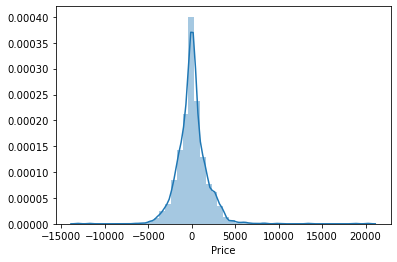

In [117]:
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'y_pred')

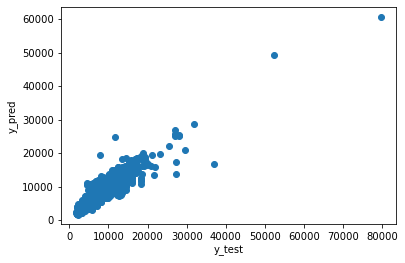

In [118]:
plt.scatter(y_test, prediction)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [119]:
from sklearn import metrics

In [120]:
metrics.r2_score(y_test, y_pred)

0.8587102538911691

Since xgboost model as of now been the most useful model, we will be continuing with xgboost model

In [121]:
xg_test.head()

,Total_Stops,Price,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,1,,24,3,1,17,17,4,25,655,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,,1,5,0,6,6,10,20,240,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,,9,6,1,19,19,19,0,1425,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,,12,5,1,8,8,21,0,780,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,,1,3,0,23,23,2,45,170,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
xg_test.drop('Price',axis = 1,inplace = True)

In [123]:
#Final Prediction on test data
prediction_test = xg_random.predict(xg_test)

In [124]:
pd.DataFrame(prediction_test)

,0
0,12190.837891
1,4156.045898
2,11763.961914
3,10703.247070
4,10687.649414
...,...
2666,14608.256836
2667,5095.616211
2668,13861.619141
2669,7406.556152


In [125]:
import pickle

In [126]:
# Saving model to disk
pickle.dump(xg_random, open('flight_model.pkl','wb'))

In [127]:
# Loading model to compare the results
model = pickle.load(open('flight_model.pkl','rb'))

In [131]:
xg_train.head()

,Total_Stops,Journey_date,Journey_month,Weekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_new,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,24,3,1,22,22,1,10,170,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,1,5,0,5,5,13,15,445,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,9,6,1,9,9,4,25,1140,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,12,5,1,18,18,23,30,325,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,3,0,16,16,21,35,285,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
